In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


<h3 style="background-color: #523; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Read the Data 🔧</h3>

**...**

In [5]:
df = pd.read_csv("Titanic-Dataset.csv")

In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3 style="background-color: #523; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Preprocessing the Data 🔧</h3>

**...**

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop(columns=["Cabin"],inplace=True)

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [12]:
df["Embarked"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of S    644
C    168
Q     77
Name: Embarked, dtype: int64>

In [13]:
df["Embarked"].isnull().sum()

2

In [14]:
df["Embarked"] = df["Embarked"].fillna("S")

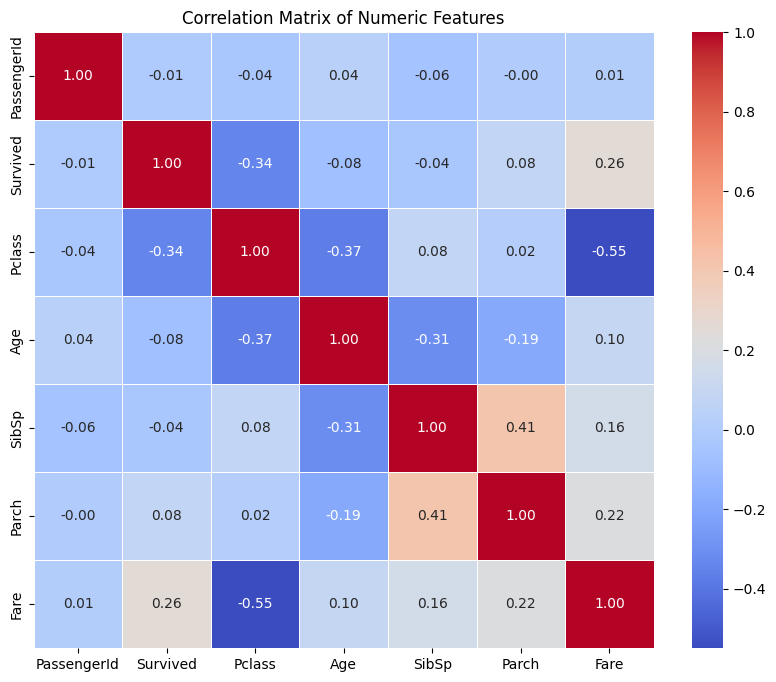

In [15]:
# 1. Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# 3. Generate the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [16]:
correlation_matrix = df.corr(numeric_only=True).abs()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652   
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629   
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443   
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119   
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838   
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000   
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass       0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [17]:
df["Age"] = df.groupby(["Sex", "Pclass", "SibSp"])["Age"].transform(lambda x: x.fillna(x.median()))


/home/mahdi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/mahdi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [18]:
print(df["Age"].isnull().sum())

7


In [19]:
#df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))


In [20]:
#print(df["Age"].isnull().sum())

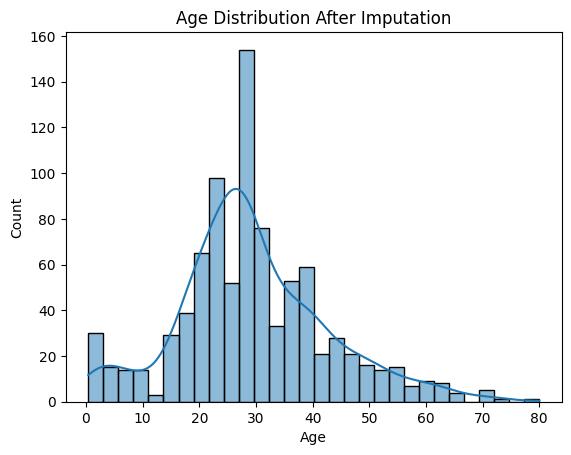

In [21]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution After Imputation")
plt.show()

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            7
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df['Name'].head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [24]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [26]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                    'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                    'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [27]:
df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [28]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [29]:
print(df["Age"].isnull().sum())
df["Age"] = df.groupby(["Sex", "Pclass", "Title"])["Age"].transform(lambda x: x.fillna(x.median()))
print(df["Age"].isnull().sum())

7
0


In [30]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

In [33]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1
5,0,3,male,27.0,0,0,8.4583,Q,Mr,1
6,0,1,male,54.0,0,0,51.8625,S,Mr,1
7,0,3,male,2.0,3,1,21.0750,S,Master,5
8,1,3,female,27.0,0,2,11.1333,S,Mrs,3
9,1,2,female,14.0,1,0,30.0708,C,Mrs,2


In [34]:
#df = pd.get_dummies(df, columns=["Sex", "Title", "Embarked"], drop_first=True)

In [35]:
#df.head(10)

# 📌 3️⃣ Scaling Numerical Features

<Axes: >

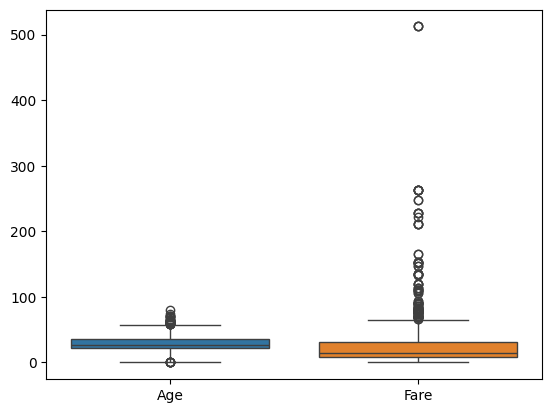

In [36]:
sns.boxplot(data=df[['Age', 'Fare']])

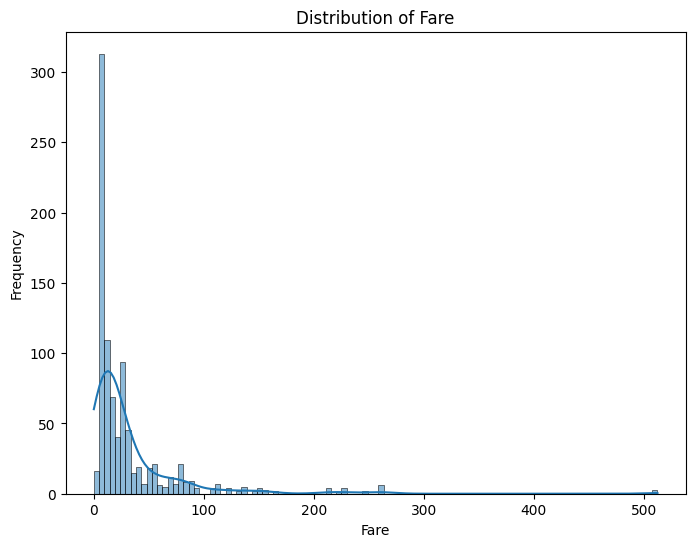

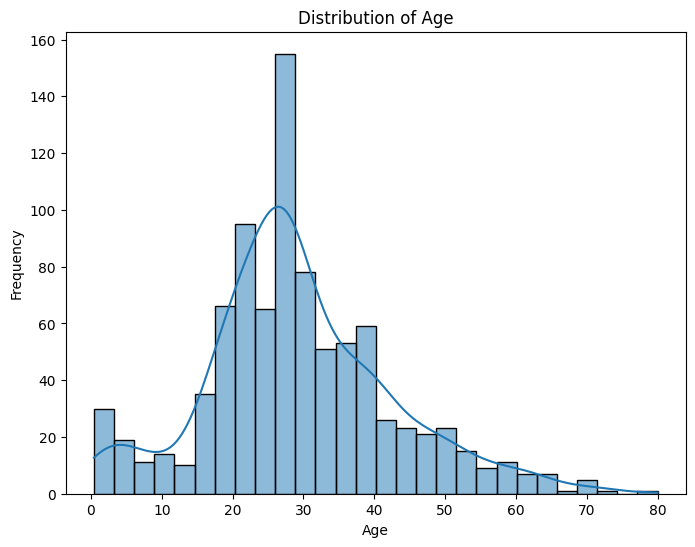

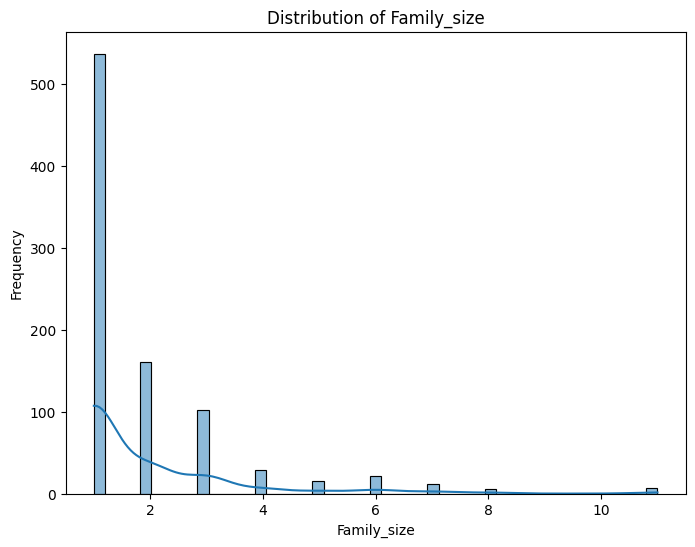

In [37]:
# For Fare
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# For Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)  # Drop NaN values for plotting Age
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# For Family_size
plt.figure(figsize=(8, 6))
sns.histplot(df['Family_size'].dropna(), kde=True)  # Drop NaN values for plotting Family_size
plt.title('Distribution of Family_size')
plt.xlabel('Family_size')
plt.ylabel('Frequency')
plt.show()

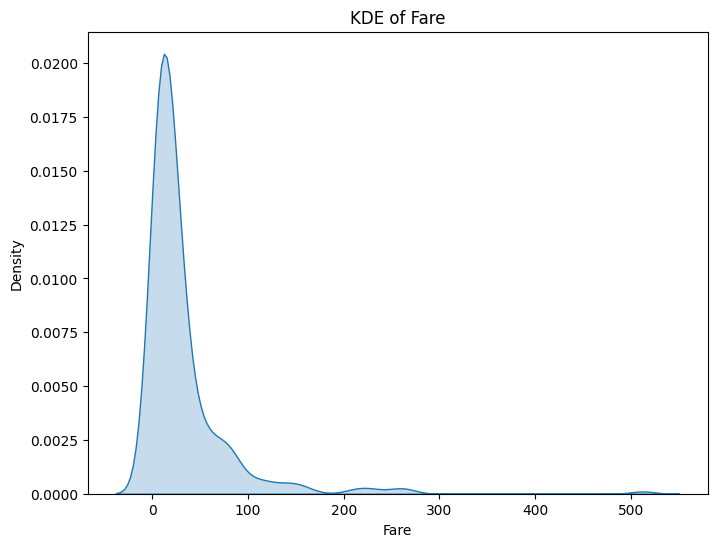

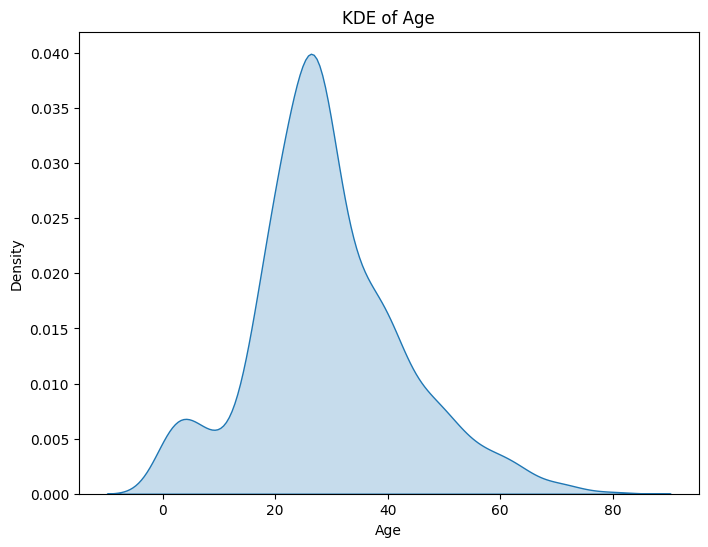

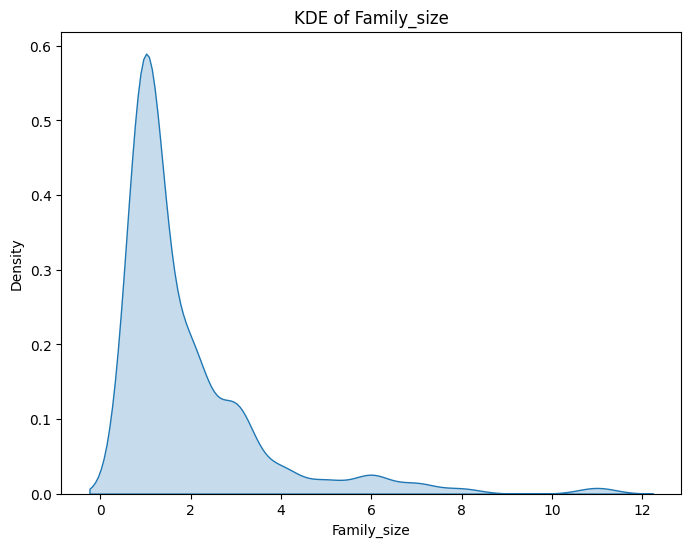

In [38]:
# For Fare
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Fare'], fill=True)
plt.title('KDE of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

# For Age
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'].dropna(), fill=True)
plt.title('KDE of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# For Family_size
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Family_size'].dropna(), fill=True)
plt.title('KDE of Family_size')
plt.xlabel('Family_size')
plt.ylabel('Density')
plt.show()

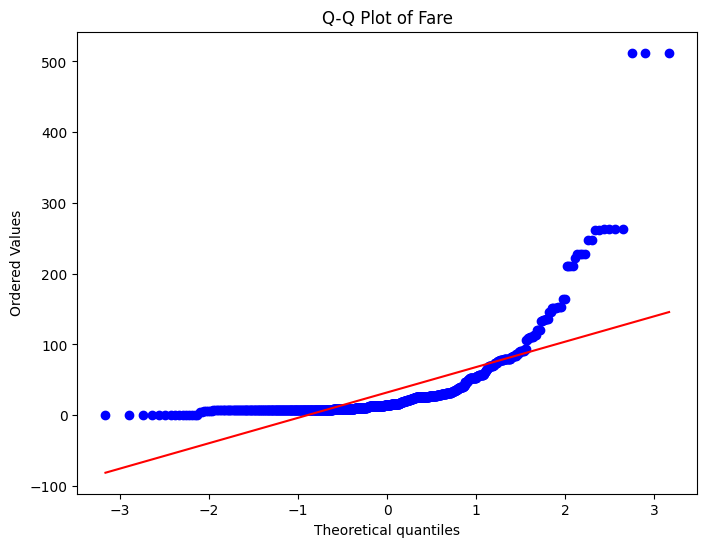

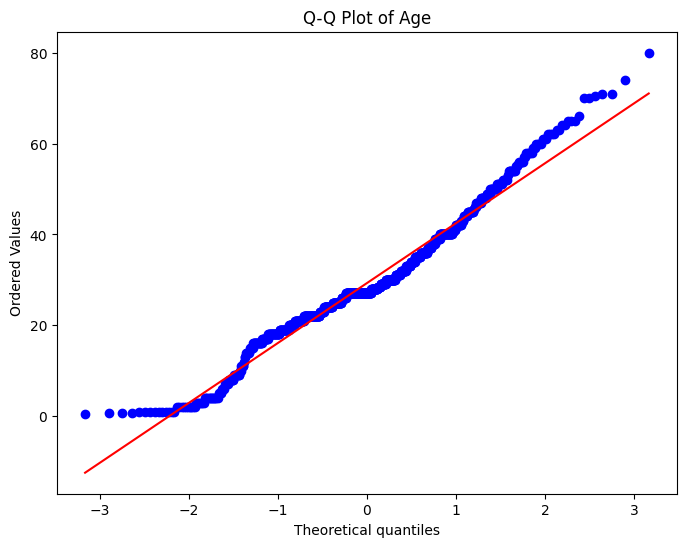

In [39]:
import scipy.stats as stats
import numpy as np

# For Fare
plt.figure(figsize=(8, 6))
stats.probplot(df['Fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare')
plt.show()

# For Age
plt.figure(figsize=(8, 6))
stats.probplot(df['Age'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

In [40]:
from scipy.stats import shapiro

# For Fare
fare_data = df['Fare'].dropna()
if len(fare_data) > 3:  # Shapiro-Wilk is not reliable for very small samples
    stat_fare, p_fare = shapiro(fare_data)
    print(f"Shapiro-Wilk Test for Fare: Statistic={stat_fare:.3f}, p-value={p_fare:.3f}")
    alpha = 0.05
    if p_fare > alpha:
        print("Fare looks Gaussian (fail to reject H0)")
    else:
        print("Fare does not look Gaussian (reject H0)")
else:
    print("Insufficient data points for Shapiro-Wilk test on Fare.")

# For Age
age_data = df['Age'].dropna()
if len(age_data) > 3:
    stat_age, p_age = shapiro(age_data)
    print(f"Shapiro-Wilk Test for Age: Statistic={stat_age:.3f}, p-value={p_age:.3f}")
    if p_age > alpha:
        print("Age looks Gaussian (fail to reject H0)")
    else:
        print("Age does not look Gaussian (reject H0)")
else:
    print("Insufficient data points for Shapiro-Wilk test on Age.")

Shapiro-Wilk Test for Fare: Statistic=0.522, p-value=0.000
Fare does not look Gaussian (reject H0)
Shapiro-Wilk Test for Age: Statistic=0.971, p-value=0.000
Age does not look Gaussian (reject H0)


In [41]:
from scipy.stats import kstest, norm
from statsmodels.stats.diagnostic import lilliefors

# For Fare
fare_data = df['Fare'].dropna()
if len(fare_data) > 1:
    stat_fare, p_fare = lilliefors(fare_data, 'norm')
    print(f"Lilliefors Test for Fare: Statistic={stat_fare:.3f}, p-value={p_fare:.3f}")
    alpha = 0.05
    if p_fare > alpha:
        print("Fare looks Gaussian (fail to reject H0)")
    else:
        print("Fare does not look Gaussian (reject H0)")
else:
    print("Insufficient data points for Lilliefors test on Fare.")

# For Age
age_data = df['Age'].dropna()
if len(age_data) > 1:
    stat_age, p_age = lilliefors(age_data, 'norm')
    print(f"Lilliefors Test for Age: Statistic={stat_age:.3f}, p-value={p_age:.3f}")
    if p_age > alpha:
        print("Age looks Gaussian (fail to reject H0)")
    else:
        print("Age does not look Gaussian (reject H0)")
else:
    print("Insufficient data points for Lilliefors test on Age.")

# For Age
age_data = df['Family_size'].dropna()
if len(age_data) > 1:
    stat_age, p_age = lilliefors(age_data, 'norm')
    print(f"Lilliefors Test for Age: Statistic={stat_age:.3f}, p-value={p_age:.3f}")
    if p_age > alpha:
        print("Family_size looks Gaussian (fail to reject H0)")
    else:
        print("Family_size does not look Gaussian (reject H0)")
else:
    print("Insufficient data points for Lilliefors test on Age.")

Lilliefors Test for Fare: Statistic=0.282, p-value=0.001
Fare does not look Gaussian (reject H0)
Lilliefors Test for Age: Statistic=0.103, p-value=0.001
Age does not look Gaussian (reject H0)
Lilliefors Test for Age: Statistic=0.315, p-value=0.001
Family_size does not look Gaussian (reject H0)




# 📌 3️⃣ Scaling Numerical Features



In [42]:
# Initialize RobustScaler
#scaler = RobustScaler()

# Apply to relevant columns
#df[['Age', 'Fare', 'Family_size']] = scaler.fit_transform(df[['Age', 'Fare', 'Family_size']])

In [43]:
#df.head(10)



# 📌 1️⃣ Train-Test Split



In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [45]:
# Define target and features
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # to preserve class distribution
)

In [46]:
from sklearn.compose import ColumnTransformer

# Define which columns are numerical and categorical
numeric_features = ['Age', 'Fare', 'Family_size']
categorical_features = ['Sex', 'Title', 'Embarked']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'  # or 'passthrough' if you want to keep other columns
)

In [47]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Dictionary of models
models = {
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianProcess": GaussianProcessClassifier(),
    "LogisticRegressionCV": LogisticRegressionCV(max_iter=1000),
    "PassiveAggressive": PassiveAggressiveClassifier(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "SGDClassifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "NuSVC": NuSVC(probability=True),
    "LinearSVC": LinearSVC(max_iter=5000),
    "DecisionTree": DecisionTreeClassifier(),
    "ExtraTree": ExtraTreeClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "NeuralNet": MLPClassifier(max_iter=1000)
}


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Display results sorted by accuracy
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df)


/home/mahdi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/mahdi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:47:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                   Model  Accuracy
19                   LDA  0.843575
8      RidgeClassifierCV  0.843575
16             LinearSVC  0.843575
6   LogisticRegressionCV  0.837989
14                   SVC  0.832402
15                 NuSVC  0.821229
3       GradientBoosting  0.821229
9          SGDClassifier  0.815642
18             ExtraTree  0.815642
4           RandomForest  0.810056
5        GaussianProcess  0.804469
0               AdaBoost  0.793296
2             ExtraTrees  0.787709
12            GaussianNB  0.787709
17          DecisionTree  0.782123
22             NeuralNet  0.776536
21               XGBoost  0.770950
1                Bagging  0.765363
11           BernoulliNB  0.765363
10            Perceptron  0.759777
13                   KNN  0.754190
7      PassiveAggressive  0.659218
20                   QDA  0.631285


<h3 style="background-color: #523; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Tuning the Top 4 Machine Learning Models for Better Results 🔧</h3>

**We will focus on tuning the top 4 performing models from our data frame to enhance their performance and achieve better results.**

In [49]:

# List of your best models
models = [
    ('LDA', LinearDiscriminantAnalysis()),
    ('RidgeClassifierCV', RidgeClassifierCV()),
    ('LinearSVC', LinearSVC(max_iter=10000)),
    ('LogisticRegressionCV', LogisticRegressionCV(max_iter=10000))
]

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Test Accuracy'])

# Loop through models
for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Test Accuracy': [acc]})], ignore_index=True)

# Sort by accuracy
results = results.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

print(results)

                  Model  Test Accuracy
0                   LDA       0.843575
1     RidgeClassifierCV       0.843575
2             LinearSVC       0.843575
3  LogisticRegressionCV       0.837989


In [53]:
from sklearn.model_selection import GridSearchCV

In [56]:

lda_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

lda_param_grid = [
    {'classifier__solver': ['svd'], 'classifier__shrinkage': [None]},
    {'classifier__solver': ['lsqr', 'eigen'], 'classifier__shrinkage': [None, 'auto']}
]


# GridSearchCV
lda_grid = GridSearchCV(lda_pipe, lda_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lda_grid.fit(X_train, y_train)

print("LDA Best Params:", lda_grid.best_params_)
print("LDA Best CV Score:", lda_grid.best_score_)

# Evaluate on test set
y_pred = lda_grid.predict(X_test)  # Use lda_grid instead of grid_search
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)


LDA Best Params: {'classifier__shrinkage': None, 'classifier__solver': 'svd'}
LDA Best CV Score: 0.8160642174726682
Test Accuracy: 0.8435754189944135


In [ ]:

ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifierCV())
])

ridge_param_grid = {
    'classifier__alphas': [[0.1, 1.0, 10.0, 100.0]],
    'classifier__scoring': ['accuracy']
}

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

print("Ridge Best Params:", ridge_grid.best_params_)
print("Ridge Best CV Score:", ridge_grid.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)


Ridge Best Params: {'classifier__alphas': [0.1, 1.0, 10.0, 100.0], 'classifier__scoring': 'accuracy'}
Ridge Best CV Score: 0.8160642174726682
Test Accuracy: 0.8435754189944135


In [ ]:
svc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(max_iter=500000))
])

svc_param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'classifier__penalty': ['l2'],
    'classifier__loss': ['squared_hinge'],
    'classifier__dual': [False, True]
}

svc_grid = GridSearchCV(svc_pipe, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)

print("LinearSVC Best Params:", svc_grid.best_params_)
print("LinearSVC Best CV Score:", svc_grid.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)


LinearSVC Best Params: {'classifier__C': 10.0, 'classifier__dual': False, 'classifier__loss': 'squared_hinge', 'classifier__penalty': 'l2'}
LinearSVC Best CV Score: 0.8216684723726978
Test Accuracy: 0.8435754189944135


In [ ]:

# Define pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(max_iter=10000))
])

# Define hyperparameter grid
param_grid = {
    'classifier__Cs': [5, 10, 20],
    'classifier__cv': [5, 10],
    'classifier__scoring': ['accuracy']
}

# Grid Search
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)


Best Parameters: {'classifier__Cs': 5, 'classifier__cv': 5, 'classifier__scoring': 'accuracy'}
Best CV Score: 0.8230670737712991
Test Accuracy: 0.8435754189944135


<h3 style="background-color: #523; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Final Results 🔧</h3>

**The final results for the 4 best model.**

Model                 | CV Score    | Test Accuracy <br>
LogisticRegressionCV  | 0.8231      | 0.8436 <br>
LinearSVC             | 0.8217      | 0.8436 <br> 
RidgeClassifierCV     | 0.8161      | 0.8436 <br> 
LDA                   | 0.8161      | 0.8435

# ✅ Which Model is Better Now?
Based on CV Score (selection criterion):

LogisticRegressionCV is the best model.

Why?

Highest CV score (0.8231)

No convergence warnings

Same test accuracy as others

This suggests it is slightly more stable and reliable across different training folds, while generalizing equally well on your test set.